# Diabetes Prediction Using Machine Learning Algorithms

***Problem Statement***

Diabetes is a chronic disease that occurs when the body cannot properly regulate blood sugar levels. Early prediction of diabetes can help in timely treatment and lifestyle changes. This project aims to predict whether a person is diabetic based on medical attributes using machine learning techniques.

***Objectives***

To analyze medical data related to diabetes

To preprocess and clean the dataset

To apply machine learning algorithms for prediction

To compare model performance using evaluation metrics

To build a simple prediction system

***Dataset***

Pima Indians Diabetes Dataset

***Features:***

- Pregnancies

- Glucose

- BloodPressure

- SkinThickness

- Insulin

- BMI

- DiabetesPedigreeFunction

- Age

- Target:

    * 0 → Non-Diabetic

    * 1 → Diabetic

In [1]:
# Data handling
import numpy as np
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Model saving & loading
import pickle

collecting data

In [2]:
# Load the dataset
data = pd.read_csv("diabetes.csv")
# Display first 5 rows
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      192             72              1      148  43.8   
1            3      107             77             44      136  39.5   
2           12       93             92             25      201  25.0   
3           14      138             45             13      116  33.9   
4           10      185             97              6      153  44.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     1.690   44        1  
1                     0.329   19        0  
2                     1.665   52        1  
3                     0.849   35        1  
4                     1.058   31        1

In [4]:
data.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
295            6      174             65             35      292  29.8   
296            3       70             67             22      152  20.6   
297            6      161             62              0      192  28.9   
298           10      182             53             39       72  34.0   
299            7      125             63             14      139  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
295                     0.439   56        1  
296                     0.609   61        1  
297                     2.065   64        1  
298                     0.874   42        1  
299                     0.155   54        1

In [6]:
data.shape

(300, 9)

we have 300 rows and 9 columns

data preprocessing

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               300 non-null    int64  
 1   Glucose                   300 non-null    int64  
 2   BloodPressure             300 non-null    int64  
 3   SkinThickness             300 non-null    int64  
 4   Insulin                   300 non-null    int64  
 5   BMI                       300 non-null    float64
 6   DiabetesPedigreeFunction  300 non-null    float64
 7   Age                       300 non-null    int64  
 8   Outcome                   300 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.2 KB


In [8]:
# Check missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

we dont have any missing values 

Replacing Zero Values with Mean

In [9]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    data[col] = data[col].replace(0, data[col].mean())

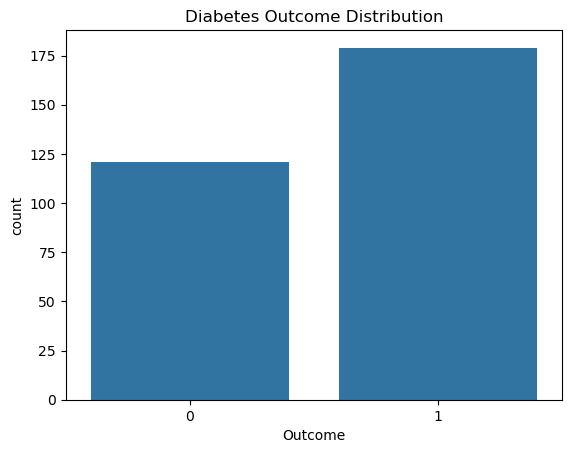

In [10]:
# Outcome distribution
sns.countplot(x="Outcome", data=data)
plt.title("Diabetes Outcome Distribution")
plt.show()

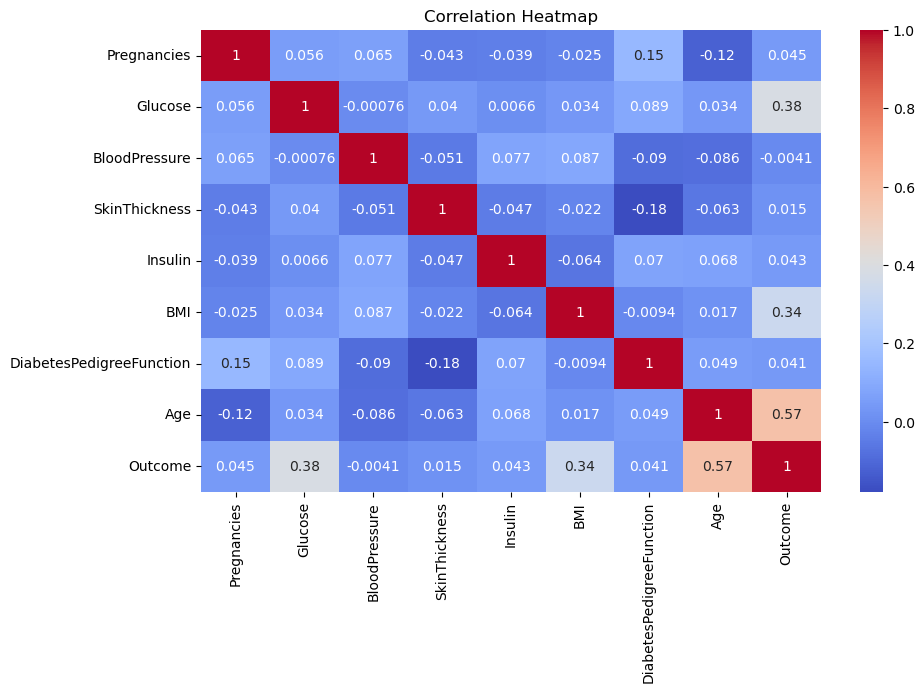

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

feature selection

In [13]:
# Features and Target
X = data.drop("Outcome", axis=1) #removing Outcome col
y = data["Outcome"]
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      192             72            1.0      148  43.8   
1            3      107             77           44.0      136  39.5   
2           12       93             92           25.0      201  25.0   
3           14      138             45           13.0      116  33.9   
4           10      185             97            6.0      153  44.5   

   DiabetesPedigreeFunction  Age  
0                     1.690   44  
1                     0.329   19  
2                     1.665   52  
3                     0.849   35  
4                     1.058   31

Train-Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Model training

In [ ]:
# Initialize model
model = LogisticRegression(max_iter=1000)
# Train model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

saving model for prediction

In [16]:
# Save trained model
with open("diabetes_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully as diabetes_model.pkl")

Model saved successfully as diabetes_model.pkl


model evaluation

In [17]:
# Predictions
y_pred = model.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8166666666666667
Confusion Matrix:
 [[18  4]
 [ 7 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        22
           1       0.89      0.82      0.85        38

    accuracy                           0.82        60
   macro avg       0.80      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



checking Prediction on New Data

In [18]:
# New patient input
new_data = np.array([[2, 120, 70, 25, 100, 28.5, 0.45, 32]])

prediction = model.predict(new_data)

if prediction[0] == 1:
    print("Result: The person is DIABETIC")
else:
    print("Result: The person is NOT DIABETIC")

Result: The person is NOT DIABETIC


c:\Users\shaik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


***Conclusion***

The diabetes prediction system successfully predicts whether a person is diabetic using machine learning. Logistic Regression provides good accuracy with low complexity, making it suitable for early diabetes detection. This system can assist healthcare professionals in decision-making.